In [38]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd
import numpy as np
from pathlib import Path
from skimage.io import imshow_collection, imread_collection
from skimage.transform import resize
from skimage.exposure import equalize_adapthist

In [2]:
train_data = pd.read_csv('dataset/Train.csv')
test_data = pd.read_csv('dataset/Test.csv')
data = pd.concat((train_data, test_data))

In [4]:
examples = list(imread_collection('dataset/Meta/*.png'))

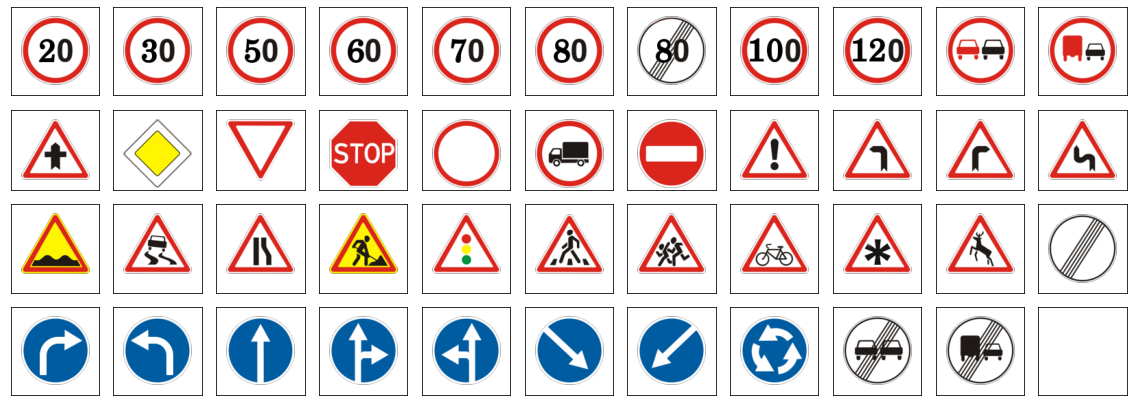

In [5]:
fig = plt.figure(figsize=(20, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 11), axes_pad=0.2)
for ax, im in zip(grid, examples): 
    ax.imshow(np.pad(im, ((15, 15), (15, 15), (0, 0))))
for ax in grid: 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [40]:
im_names = ['dataset/' + s for s in data[data['Path'].str.startswith('Train')]['Path'].sample(16)]
images = list(imread_collection(im_names))

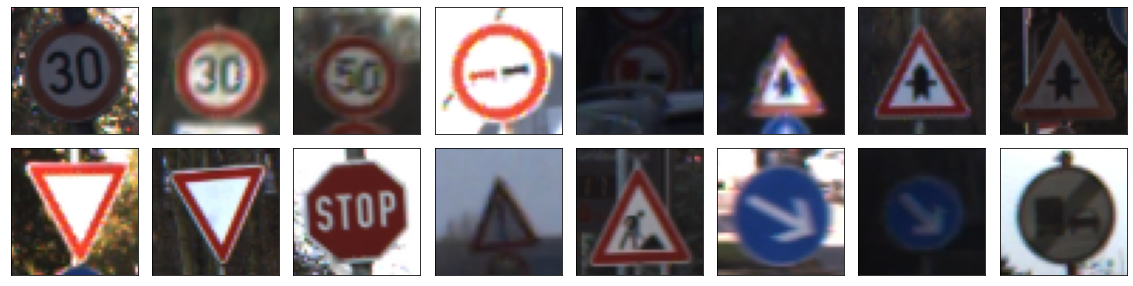

In [41]:
fig2 = plt.figure(figsize=(20, 10))
grid2 = ImageGrid(fig2, 111, nrows_ncols=(2, 8), axes_pad=0.2)
for ax2, im2 in zip(grid2, images): 
    ax2.imshow(resize(im2, (45, 45)))
for ax2 in grid2: 
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

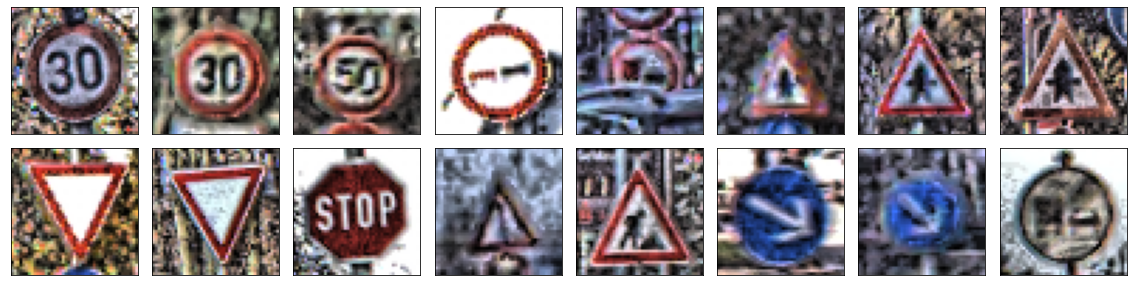

In [42]:
fig3 = plt.figure(figsize=(20, 10))
grid3 = ImageGrid(fig3, 111, nrows_ncols=(2, 8), axes_pad=0.2)
for ax3, im3 in zip(grid3, images): 
    resized_img = resize(im3, (45, 45))
    ax3.imshow(equalize_adapthist(resized_img, clip_limit=0.1))
for ax3 in grid3: 
    ax3.get_xaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)

<AxesSubplot:>

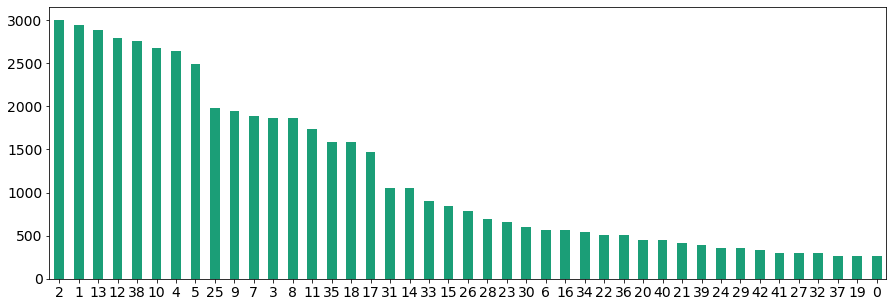

In [3]:
data['ClassId'].value_counts().plot.bar(figsize=(15, 5), rot=0, fontsize=14, colormap='Dark2')